# Prediciting heart disease using machine learning 

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not a patient has heart disease - based on their medical attributes.

We're going to take the following approach: 
1. Problem defintiion
2. Data 
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation 

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict or not whether they have heart disease? 

## 2. Data 

The original data came from the UCI website - also on Kaggle.

## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept - we will pursue the project

## 4. Features 

**Create data dictionary** 

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## Preparing the Tools

We're going to use pandas, matplotlib and Numpy for data analysis and manipulation 

In [41]:
# Import all the tools we need 

# Regular EDA and plotting libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

# Models from scikit learn 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve

# Load Data 

In [42]:
df = pd.read_csv("data/heart-disease.csv")
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


((303, 14), None)

## Exploratory Data Analysis

The goal here is to find out mroe about the data and become a subject matter expert in the dataset you are working with! 

1. What questions are you trying to solve?
2. What kind of data do you have and how are treating them? 
3. Whats missing from the data and how to deal with it? 
4. Where are the outliers and why you should care about them? 
5. How can you add, change or remove features to get more out of the data?

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

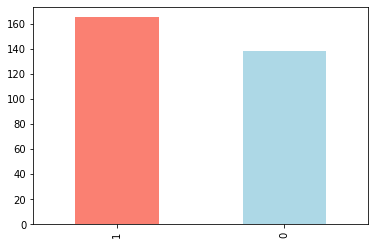

In [45]:
df['target'].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [49]:
test = df[['thalach', 'chol', 'trestbps', 'age']]

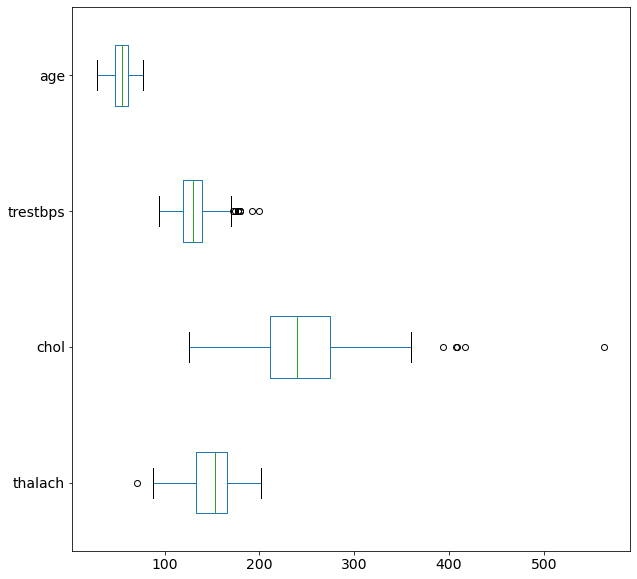

In [50]:
test.boxplot(figsize = (10,10), 
          grid = False, 
      fontsize = 14, 
          rot = 0, 
          vert =False)

Comparing different features (columns) to find patterns

### Heart disease frequency accoring to gender

In [51]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [52]:
# compare target column with gender column 

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


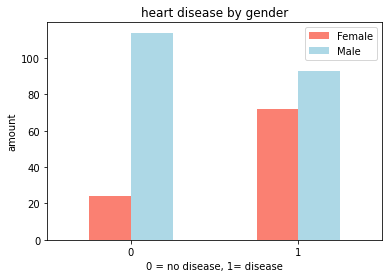

In [53]:
# crea te aplot of cross tab 

pd.crosstab(df.target, df.sex). plot(kind = "bar", color = ['salmon', 'lightblue'])
plt.title("heart disease by gender")
plt.xlabel("0 = no disease, 1= disease")
plt.ylabel("amount")
plt.legend(['Female','Male'])
plt.xticks(rotation = 0);

In [54]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [55]:
# comparing, age, thalach and target 

df['thalach'].value_counts() # has 91 different values but is still 303 rows long!

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### age vs max heart rate for haert disease

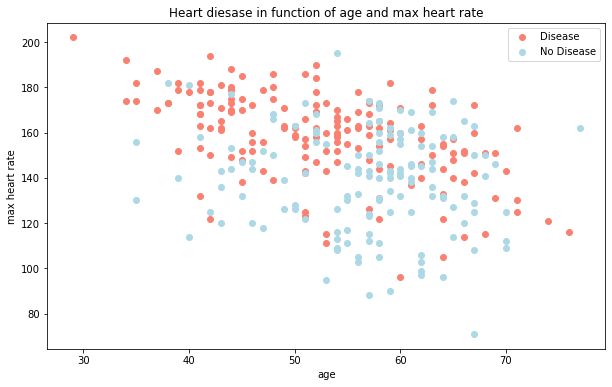

In [56]:
# create  new figure 

plt.figure(figsize = (10,6))

# plot scatter plot 

plt.scatter(df['age'][df.target == 1],
            df['thalach'][df.target ==1], 
            c = "salmon"
           )

# scatter with the negartive examples
plt.scatter(df['age'][df.target == 0],
            df['thalach'][df.target ==0], 
            c = "lightblue"
           )

plt.xlabel("age")
plt.ylabel("max heart rate")
plt.title("Heart diesase in function of age and max heart rate")
plt.legend(['Disease', 'No Disease'])


plt.show()

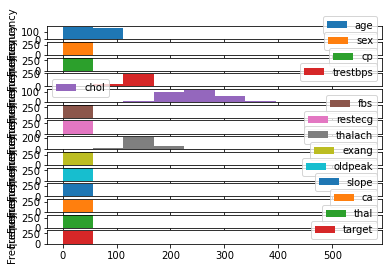

<Figure size 720x720 with 0 Axes>

In [58]:
# check the distribution of the age column with a histogram - spread of the data 

df.plot(subplots = True, kind = "hist")
plt.figure(figsize = (10,10))
plt.show();

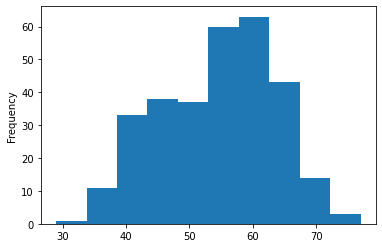

In [59]:
df.age.plot.hist();

### Chest pain type vs target
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [60]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [61]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


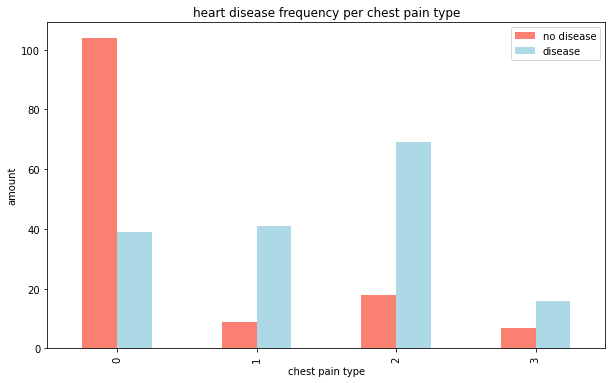

In [62]:
# make the crossstab more visual 

pd.crosstab(df.cp,df.target).plot(kind = "bar", 
                                 figsize = (10,6), 
                                 color = ['salmon', 'lightblue'])

plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(['no disease', 'disease'])
plt.show();

In [ ]:
df.head()

## Correlation Matrix
How each independent variable relates with each other

In [63]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


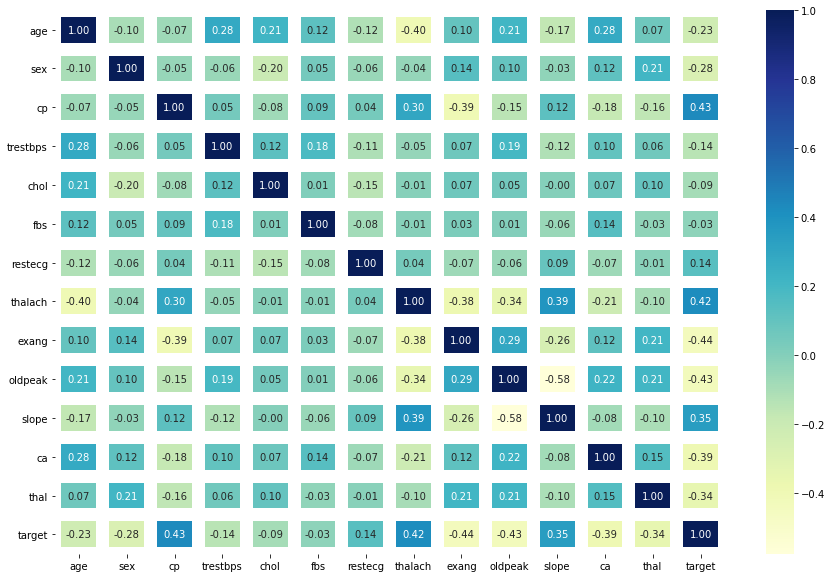

In [64]:
# plotting the correlation matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15,10))

ax = sns.heatmap(corr_matrix, 
                annot = True, 
                linewidths = 12, 
                fmt = ".2f", 
                cmap = "YlGnBu")

plt.show()

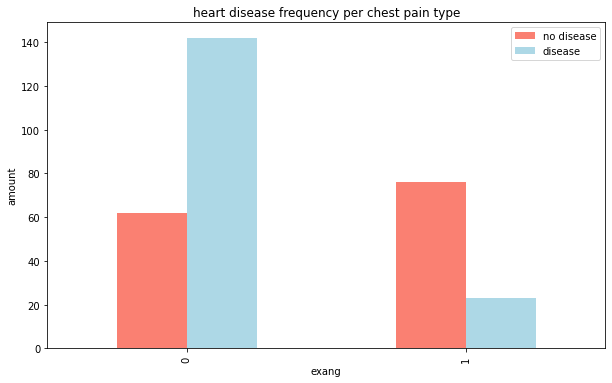

In [65]:
pd.crosstab(df.exang,df.target).plot(kind = "bar", 
                                 figsize = (10,6), 
                                 color = ['salmon', 'lightblue'])

plt.title("heart disease frequency per chest pain type")
plt.xlabel("exang")
plt.ylabel("amount")
plt.legend(['no disease', 'disease'])
plt.show();

# 5. Modelling

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
# split data into features and label
X = df.drop('target', axis = 1)
y = df['target']

np.random.seed(42)

# create train, test split of data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [68]:
len(y_train)

242

Now data is split into training and test sets - build the machine learning model 

Train it to find patterns on the training set 

Test it to evaluate those patterns on the test set

The following 3 models to build: 
1. Logistic Regression 
2. K-Nearest Neighbours 
3. Random Forest Classifier

In [69]:
# put models into a dictionary 

models = {"Logistic Regression": LogisticRegression(), 
         "KNN" : KNeighborsClassifier(), 
         "Random Forest": RandomForestClassifier()}

# create a functiont o fit and score models 
def fit_and_score(models, X_train, X_test, y_train,y_test): 
    
    """
    Fits and evaluates a given machine learning models: 
    models: a dict of differnet scikitlearn machine learning models 
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: training labels 
    y_test: test labels 
    """
    # set random seed 
    
    np.random.seed(42)
    
    # make dict to keep model scores: 
    
    model_scores = {}
    
    # loop through models 
    
    for name, model in models.items(): 
        # fir the model to the data 
        model.fit(X_train, y_train)
        
        # evlauate the model and appends it ssocre to model_scores 
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores
    
    
    

In [70]:
model_outcomes = fit_and_score(models, X_train,X_test,y_train,y_test)

/home/personal/Desktop/heart_disease_project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
model_outcomes

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

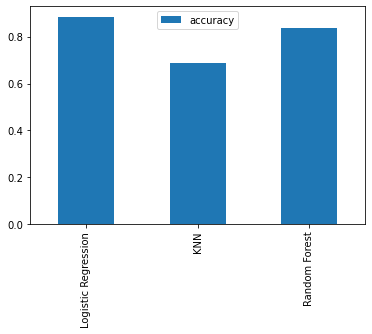

In [72]:
model_comparison = pd.DataFrame(model_outcomes, index = ['accuracy'])
model_comparison.T.plot.bar();

So at this point we have the baseline model - and a models first predrictions are not always what we should base our next steps off!

So what do we do?

* Hyperparameter turning 
* Feature Importance 
* Confusiuon Matric 
* Cross validation 
* Precision 
* Recall 
* F1 Score 
* Classification REport 
* ROC Curve 
* Area under the curve (AUC)

## Hyperparameter Tuning

In [ ]:
# tuning KNN 

train_scores = []
test_scores = [] 

# create a list of different values for n_neighbors 

neighbors = range(1,21)

# setup KNN instance 

knn = KNeighborsClassifier()

# loop through different n_neighbors 
for i in neighbors: 
    knn.set_params(n_neighbors = i)
    
    # fit the model 
    knn.fit(X_train,y_train)
    
    # train scores 
    
    train_scores.append(knn.score(X_train,y_train)) 
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
test_scores,train_scores


In [ ]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "test score")
plt.xlabel("Number of neighbors")
plt.xticks(range(1,21))
plt.ylabel("model score")
plt.legend()
plt.show()

# best score is at neighbors = 11

## Hyperparameter tuning with randomizedsearchCV

Tuning the following models: 
* LogisticRegression()
* RandomForestClassifier()

By using RandomizedSearchCV()

In [ ]:
# grid for logistic regression 

log_reg_grid = {"C": np.logspace(-4,4,20), 
               "solver": ['liblinear']}

# create grid for random forect classifier

rf_grid = {'n_estimators': np.arange(10,1011,50), 
          "max_depth": [None, 3,5,10], 
          'min_samples_split': np.arange(2,20,2), 
          'min_samples_leaf': np.arange(1,20,2)}

In [ ]:
# Tune logistic regresion 

np.random.seed(42)

# setup random hypeterparamet search for logreg 

rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions=log_reg_grid, cv = 5, 
                                n_iter = 20, 
                                verbose = True
                           )

# fir the random hyperparamet search model for log reg 

rs_log_reg.fit(X_train,y_train)

In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(X_test,y_test)

In [ ]:
# for the randomforest classifier()

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions=rf_grid, 
                          cv =5, 
                          n_iter = 20, 
                          verbose = True)

# fir the random hyperprametr esearch model for ther andom forest classiefer

rs_rf.fit(X_train,y_train)

In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(X_test,y_test)

In [ ]:
model_outcomes

# Grid Search CV

Since our logistic regression model provides the best model scores so far, we will imprpve them again using GridSearchCV

In [73]:
log_reg_grid = {'C': np.logspace(-4,4,30), 
               'solver': ['liblinear']}

# setup grid hypereparameter search 

gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid = log_reg_grid,cv =5,n_jobs=-1)

gs_log_reg.fit(X_train,y_train)





GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']})

In [78]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [74]:
alt_log_reg_grid = {'penalty':['elasticnet'], 'C': np.logspace(-4,4,30), 
               'solver': ['saga'], 
                   'l1_ratio':np.array([0.20,0.40,0.80]) }

# setup grid hypereparameter search 

alt_gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid = alt_log_reg_grid,cv =5,n_jobs=-1)

alt_gs_log_reg.fit(X_train,y_train)

/home/personal/Desktop/heart_disease_project/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.2, 0.4, 0.8]),
                         'penalty': ['elasticnet'], 'solver': ['saga']})

In [75]:
alt_gs_log_reg.best_params_


{'C': 0.008531678524172805,
 'l1_ratio': 0.8,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [76]:
alt_gs_log_reg.score(X_test,y_test)

0.7868852459016393

In [77]:
model_outcomes

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned machine learning classfier beyond accuracy 

* ROC curve and AUC Score 
* Confusion Matrix 
* Classification Report 
* Precision 
* Recall 
* F1 score 

And useful if cross-validation is used where possible

To make comparisons and evaluate our trained model, first we need to make predictions

In [79]:
# make predictions with tuned model 

y_preds = gs_log_reg.predict(X_test)

In [80]:
y_preds[:10], y_test[:10]

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1]),
 179    0
 228    0
 111    1
 246    0
 60     1
 9      1
 119    1
 223    0
 268    0
 33     1
 Name: target, dtype: int64)

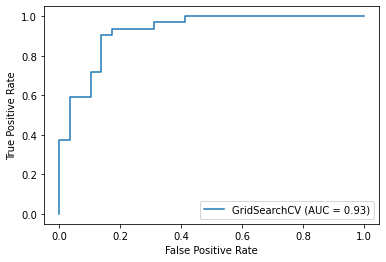

In [87]:
# import ROC cureve function 
# plot ROC curve and calculate AUC metric 
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gs_log_reg,X_test,y_test )

In [88]:
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]])

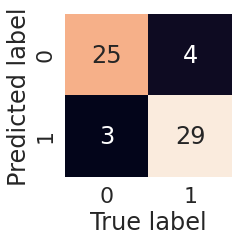

In [90]:
sns.set(font_scale= 2)

def plot_conf_mat(y_test,y_preds): 
    
    """
    creates confusion matrix using predicted values and test data
    
    """
    fig, ax = plt.subplots(figsize = (3,3))
    
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True, 
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.show()

plot_conf_mat(y_test,y_preds)
    
    

Now we have ROC curve and AUC metric and a confusioin matrix - get the classification report as well as cross validate precision, recall and f1-score

In [92]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Calculate evaluation metrics using cross validation 

Precision, recall and f1-score usign crossvalidation - using cross_val_score

In [93]:
# check the best hyperparameters
from sklearn.model_selection import cross_val_score

In [94]:
# check the best hyperparamets 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [95]:
# create a new classfier with best parameters above 

clf = LogisticRegression(C = 0.20433597178569418, 
                        solver = "liblinear")

In [122]:
# function for creating the different scores! 

def cross_val_scores_output(model, X,y): 
        """ func to return the different scores for a model based on the different scoring methods"""
     
        score_dict = {'accuracy': 'accuracy', 
                     'precision': 'precision', 
                     'recall': 'recall',
                     'f1-score': 'f1'}
        
        empty_dict = {}
        
        for key,value in score_dict.items(): 
            score = cross_val_score(model, 
                                   X,
                                   y, 
                                   cv = 5, 
                                   scoring = value)
            
            empty_dict[key] = np.mean(score)
            
        
        return empty_dict
        
        
    



In [123]:
output = cross_val_scores_output(clf, X,y)
output

{'accuracy': 0.8446994535519124,
 'precision': 0.8207936507936507,
 'recall': 0.9212121212121213,
 'f1-score': 0.8673007976269721}

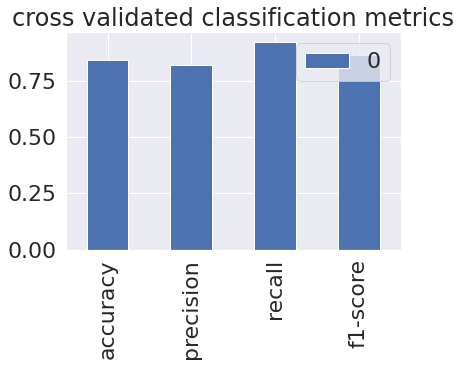

In [124]:
# visualize the cv metrics 

cv_metrics = pd.DataFrame(output,index = [0]).T
cv_metrics.plot.bar(title = "cross validated classification metrics",)
plt.legend();

# Feature Importance

Finding out which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is **different for each maching learning model**!

Research via google the model name + feature importance! 

Finding it for the logistic regression model!

In [125]:
gs_log_reg.best_params_

clf = LogisticRegression(C= 0.20433597178569418, 
                        solver = "liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [126]:
# by reaserching an attribute exists called coef_ 
# how to find feature importance using scikit learn - how each of the features contributes to the target labels
clf.coef_

array([[ 0.00316727, -0.86044576,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275782,  0.02459361, -0.60413035, -0.56862855,
         0.45051615, -0.63609861, -0.67663376]])

In [127]:
# match the coefs of eatures to columns 

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
                    
feature_dict

{'age': 0.0031672715846030935,
 'sex': -0.8604457571727641,
 'cp': 0.6606707429832999,
 'trestbps': -0.011569931252544003,
 'chol': -0.0016637408611369841,
 'fbs': 0.04386132427617729,
 'restecg': 0.3127578230667477,
 'thalach': 0.024593607391386427,
 'exang': -0.6041303464142003,
 'oldpeak': -0.5686285482723883,
 'slope': 0.4505161474321694,
 'ca': -0.6360986111170053,
 'thal': -0.6766337550845071}

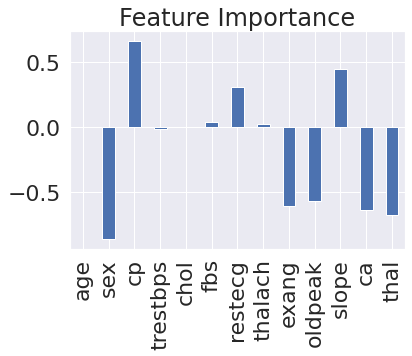

In [129]:
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);

In [130]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [131]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
